# Configuration

In [1]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1030'
EXPERIMENT_NAME = 'ReviewText_Lemma_TFIDF2 (KMeans)'
FILE_NAME = '01_ML1030_KMeans_TFIDF2'
LOAD_FROM_EXP = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1030
The current time is 18:14
Hello sir. Reminder, no more coffee.



# Setup Runtime Environment

In [3]:
%%capture
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans


nltk.download('stopwords')
%matplotlib inline

In [4]:
import importlib
import cw_df_metric_utils as cwutils
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

In [5]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/utility_files/DataExperimentSupport.py'>

# Load Data

In [6]:
#axis_labels=[1,2,3,4,5]
axis_labels=[0,1]
#classifier = RandomForestClassifier(n_jobs=-1)
#classifier = XGBClassifier(eval_metric='mlogloss', tree_method='gpu_hist')
classifier = KMeans(n_clusters=5)
#ANALSYSIS_COL = 'reviewText_lemma_bert'
UNIQUE_COL = 'uuid'
TARGET_COL = 'overall_posneg'

In [7]:
if LOAD_FROM_EXP:
    #start from saved state
    myExp = jarvis.loadExperiment(FILE_NAME)
    myExp.display()

else:
    #start from source file and regenerate
    testDf = pd.read_pickle(jarvis.DATA_DIR_EXP + '/reviewText_TF-IDF.pkl.gz')

    myExp = DataExperiment.DataExperiment(projectName=PROJECT_NAME,
                                          experimentName=EXPERIMENT_NAME,
                                          origData=testDf,
                                          uniqueColumn=UNIQUE_COL,
                                          targetColumn=TARGET_COL,
                                          classifier=classifier)

DataExperiment summary:
---> projectName: ML1030
---> experimentName: ReviewText_Lemma_TFIDF2 (KMeans)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
KMeans(n_clusters=5)

    DataPackage summary:
    Attributes:
    ---> uniqueColumn: uuid
    ---> targetColumn: overall_posneg
    Process:
    ---> isBalanced: False
    ---> isTrainTestSplit: False
    Data:
    ---> isOrigDataLoaded: True
    ---> isTrainDataLoaded: False
    ---> isTestDataLoaded: False


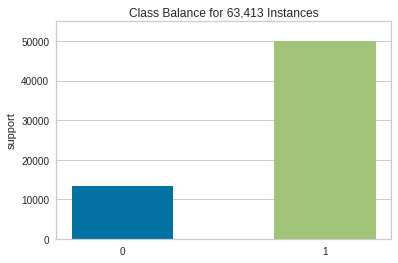

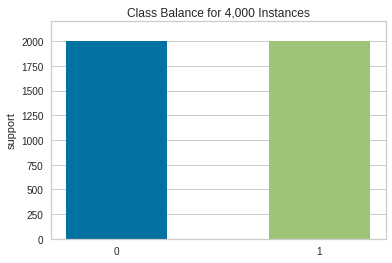

,overall_posneg,ttlCol
0,0,2000
1,1,2000


Completed train/test split (train_size = 0.8):
---> Original data size: 4000
---> Training data size: 3200
---> Testing data size: 800
---> Stratified on column: overall_posneg


In [8]:
#myExp.processDataPackage()
myExp.dataPackage.classBalanceUndersample(sampleSize=2000)
myExp.dataPackage.splitTrainTest()

In [9]:
myExp.createBaseModel()

Base Model Stats:
Accuracy: 0.27
Precision: 0.64
Recalll: 0.27
F1 Score: 0.31
Cohen kappa:: 0.03


Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [10]:
impFeatures = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.007)

TypeError: exceptions must derive from BaseException

In [ ]:
myExp.createFinalModel(featureImportanceThreshold=0.005)

In [ ]:
myExp.createBaseModelLearningCurve(n_jobs=-1)

In [ ]:
myExp.createFinalModelLearningCurve(n_jobs=-1)

In [ ]:
myExp.showBaseModelReport(axis_labels,
                          upperValue=0.025,
                          topn=10)

In [ ]:
myExp.showFinalModelReport(axis_labels,
                           startValue=0.01,
                           increment=0.001,
                           upperValue=0.03,
                           topn=10)

In [ ]:
myExp.display()

#  Save Experiment

In [ ]:
jarvis.saveExperiment(myExp, FILE_NAME)

#  Scratchpad

In [ ]:
myExp.showFinalLimeLocalImportance()

In [ ]:
myExp.showFinalLimeGlobalImportance()

In [ ]:
import shap
xTest = myExp.dataPackage.getXTrainData(finalFeatures=myExp.finalFeatures)
xTest.head()
myModel = myExp.getFinalModel()

In [ ]:
shap_values = shap.TreeExplainer(myModel).shap_values(xTest)
shap.summary_plot(shap_values, xTest, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, xTest, plot_type="dot")

In [ ]:
explainer = shap.Explainer(myModel, xTest)
shap_values = explainer(xTest)
#shap_values = shap_values


In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
#%%time
#myExp.showFinalSHAPSummary()

In [ ]:
importlib.reload(dp)
importlib.reload(dps)
importlib.reload(DataExperiment)
importlib.reload(DataExperimentSupport)